In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import sin,cos
from scipy.integrate import solve_ivp
import pysindy as ps

#  Atomic Coherence in E-Mag Field (Dr Blokhina's Model)

### Define system constants:

In [2]:
omega = 1
Lambda = 1

### Define system DEs as function:

In [3]:
def quantum_model(t, x):    
    return [
        -omega*Lambda* (x[0]*x[2])**0.5 *cos(x[3])*(sin(x[1])),  # d(I_e)/dt
        omega -0.5*omega*Lambda* (x[2]/x[0])**0.5 *(cos(x[3])*cos(x[1])),  # d(phi_e)/dt
        2*omega*x[4]*Lambda* (x[0]*x[2])**0.5 *(cos(x[1])*sin(x[3])),  # d(I_m)/dt
        omega*x[4]*Lambda* (x[0]/x[2])**0.5 *(cos(x[3])*cos(x[1])),  # d(phi_m)/dt
        -Lambda* (x[0]*x[2])**0.5 *(cos(x[1])*sin(x[3]))  # d(n)/dt
    ]

### Define time range and initial conditions:

In [4]:
dt = 0.001
t_test = np.arange(0,180,dt)
X0 = [0.5, 0.5, 0.5, 0.5, 1]

### Solve our equations using solve_ivp

In [5]:
sol = solve_ivp(quantum_model, (t_test[0], t_test[-1]), X0, t_eval=t_test) # Integrate
x_test = np.transpose(sol.y)
x_prime_test = quantum_model(t_test, X0)

C:\Users\pmunn\AppData\Local\Temp/ipykernel_45420/600256568.py:3: RuntimeWarning: invalid value encountered in double_scalars
  -omega*Lambda* (x[0]*x[2])**0.5 *cos(x[3])*(sin(x[1])),  # d(I_e)/dt
C:\Users\pmunn\AppData\Local\Temp/ipykernel_45420/600256568.py:4: RuntimeWarning: invalid value encountered in double_scalars
  omega -0.5*omega*Lambda* (x[2]/x[0])**0.5 *(cos(x[3])*cos(x[1])),  # d(phi_e)/dt
C:\Users\pmunn\AppData\Local\Temp/ipykernel_45420/600256568.py:5: RuntimeWarning: invalid value encountered in double_scalars
  2*omega*x[4]*Lambda* (x[0]*x[2])**0.5 *(cos(x[1])*sin(x[3])),  # d(I_m)/dt
C:\Users\pmunn\AppData\Local\Temp/ipykernel_45420/600256568.py:6: RuntimeWarning: invalid value encountered in double_scalars
  omega*x[4]*Lambda* (x[0]/x[2])**0.5 *(cos(x[3])*cos(x[1])),  # d(phi_m)/dt
C:\Users\pmunn\AppData\Local\Temp/ipykernel_45420/600256568.py:7: RuntimeWarning: invalid value encountered in double_scalars
  -Lambda* (x[0]*x[2])**0.5 *(cos(x[1])*sin(x[3]))  # d(n)/dt


### Plot:

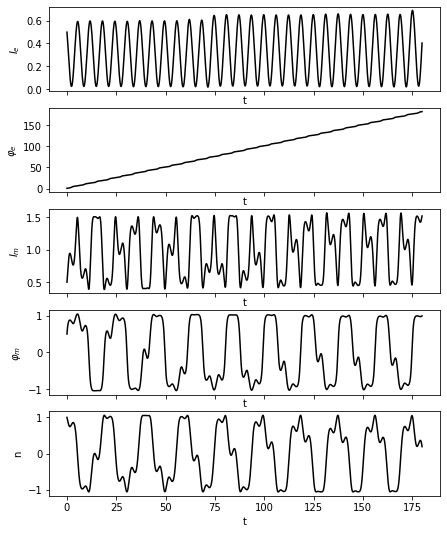

In [6]:
fig, axs = plt.subplots(x_test.shape[1], 1, sharex=True, figsize=(7,9))
plt.rc('axes', labelsize=15)
for i in range(x_test.shape[1]):
    axs[i].plot(t_test, x_test[:, i], 'k', label='$x_{}$')
    #axs[i].plot(t_test, x_prime_test[:, i], 'r', label='$x_{}$\'')
    axs[i].set(xlabel='t', ylabel=['$I_e$','$\u03C6_e$','$I_m$','$\u03C6_m$', 'n'][i])
    #axs[i].legend()